# Weather Report _Supervised_Classification _DecisionTree_RandomForest

In [ ]:
https://www.kaggle.com/datasets/apratik46/daily-weather-dataset

# import necessay libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# Data Reading

In [2]:
df= pd.read_csv("daily_weather.csv")
df

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,1


# Data Preprocessing 

In [3]:
df.shape

(1095, 10)

In [4]:
df.head(10)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,1
5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,1
6,915.598867,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,0
7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,1
8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,0
9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,1


In [5]:
df.tail(7)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
1088,912.90,71.870,129.2,1.431642,160.0,2.057985,0.0,0.0,51.84,1
1089,915.00,55.040,191.8,5.368656,220.9,7.068730,0.0,0.0,73.55,1
1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,1
1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,1
1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,1
1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,1
1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,0


# Data Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
air_pressure_9am,1092.0,918.882551,3.184161,907.990000,916.550000,918.921045,921.160073,929.320000
air_temp_9am,1090.0,64.933001,11.175514,36.752000,57.281000,65.715479,73.450974,98.906000
avg_wind_direction_9am,1091.0,142.235511,69.137859,15.500000,65.972506,166.000000,191.000000,343.400000
avg_wind_speed_9am,1092.0,5.508284,4.552813,0.693451,2.248768,3.871333,7.337163,23.554978
max_wind_direction_9am,1092.0,148.953518,67.238013,28.900000,76.553003,177.300000,201.233153,312.200000
max_wind_speed_9am,1091.0,7.019514,5.598209,1.185578,3.067477,4.943637,8.947760,29.840780
rain_accumulation_9am,1089.0,0.203079,1.593952,0.000000,0.000000,0.000000,0.000000,24.020000
rain_duration_9am,1092.0,294.108052,1598.078779,0.000000,0.000000,0.000000,0.000000,17704.000000
relative_humidity_9am,1095.0,34.241402,25.472067,6.090000,15.092243,23.179259,45.400000,92.620000
high_humidity_3pm,1095.0,0.499543,0.500228,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
543,921.65,62.87,56.7,10.714943,77.3,13.712442,0.0,0.0,21.11,0


In [10]:
df.drop_duplicates(inplace =True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [13]:
df.fillna(df.median(), inplace=True)

In [14]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [15]:
df['high_humidity_3pm'].value_counts()

1    547
0    547
Name: high_humidity_3pm, dtype: int64

# Data Visualization

<Axes: xlabel='high_humidity_3pm', ylabel='count'>

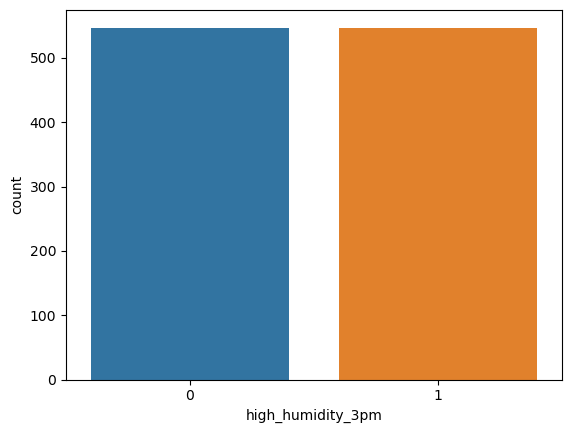

In [16]:
sns.countplot(df,x='high_humidity_3pm')

<Axes: xlabel='air_temp_9am', ylabel='Count'>

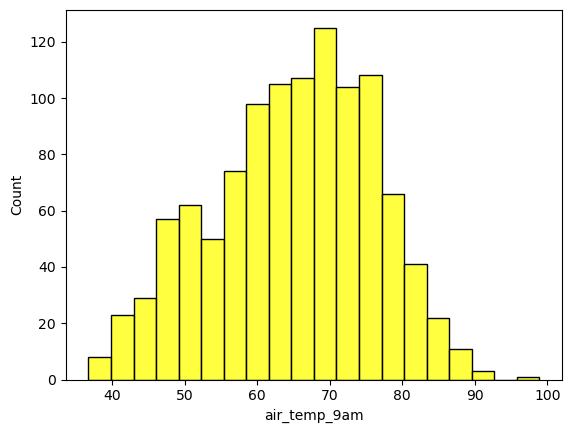

In [17]:
sns.histplot(df.air_temp_9am , color='yellow')

<Axes: xlabel='max_wind_speed_9am', ylabel='Count'>

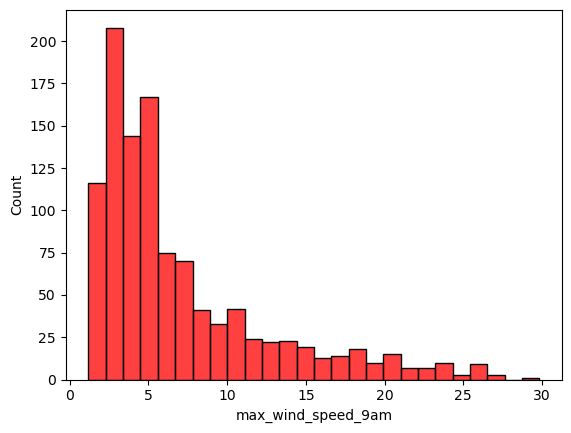

In [18]:
sns.histplot(df.max_wind_speed_9am, color='red')

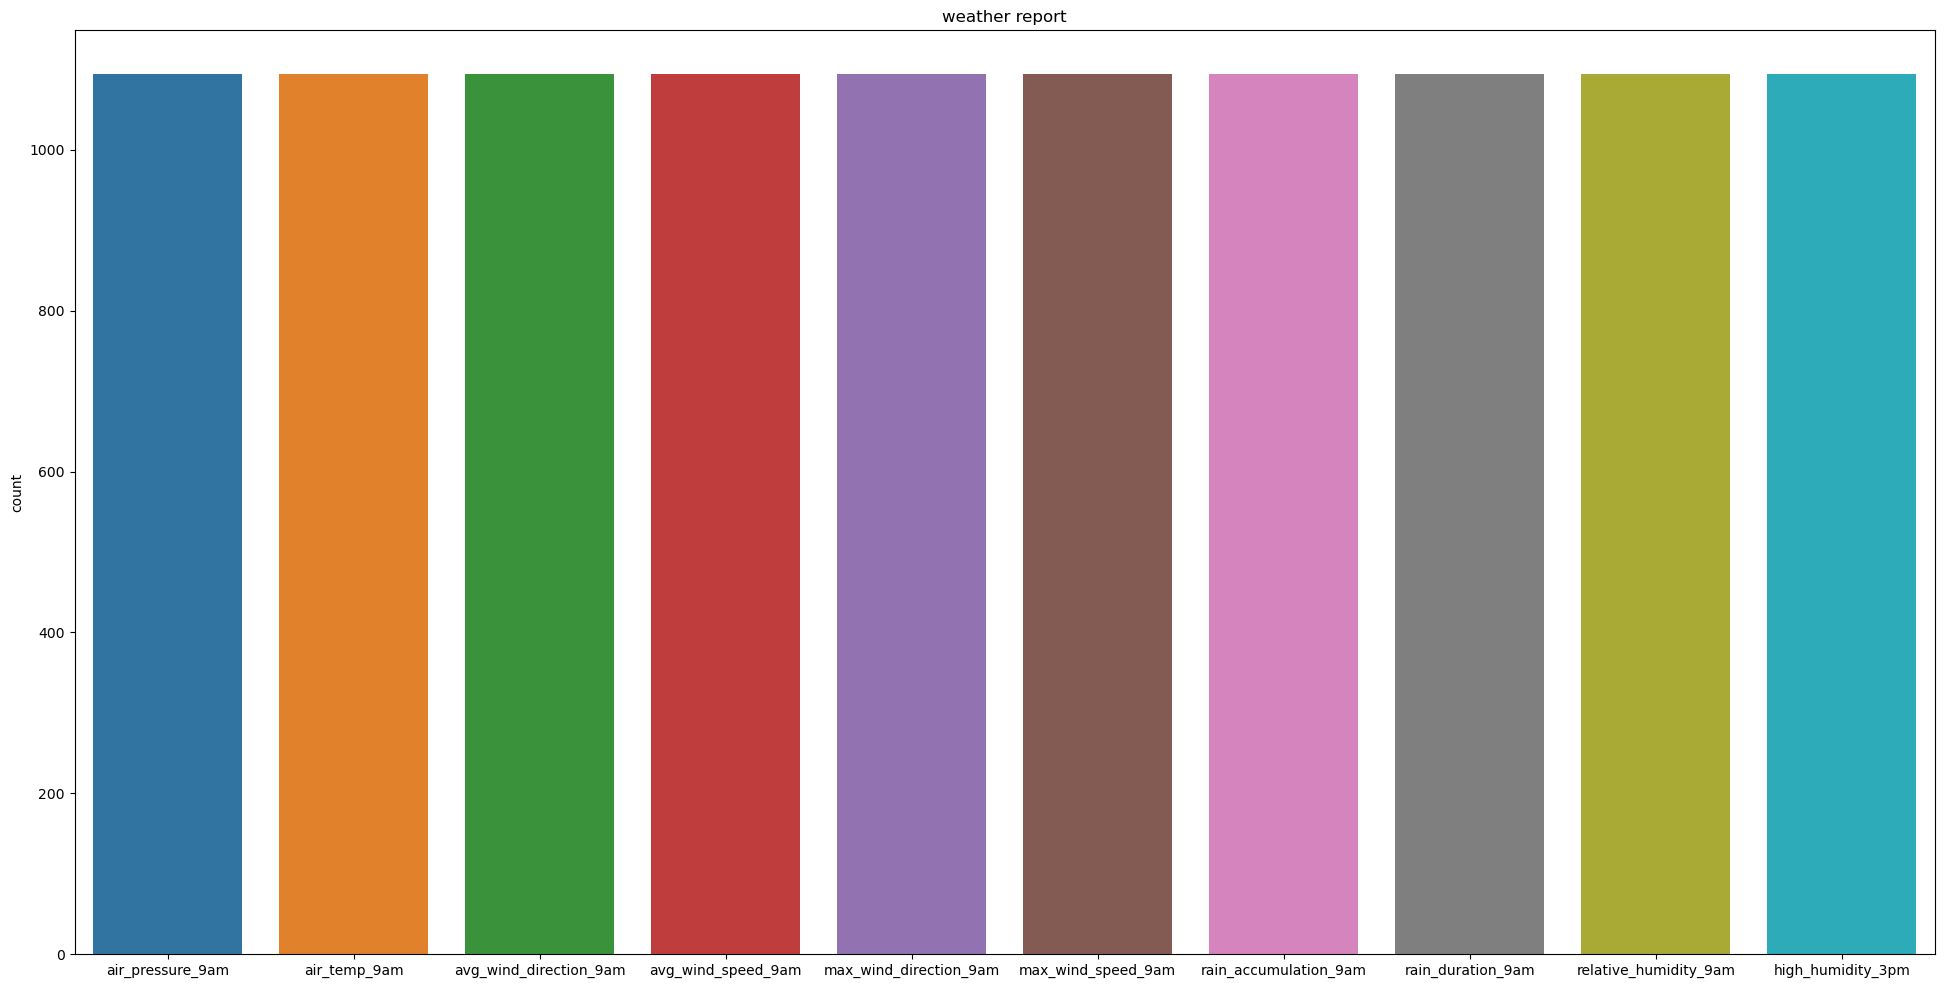

In [19]:
plt.figure(figsize=(24,12))
plt.title('weather report')
sns.countplot(df)
plt.show()

# Machine Learning Process

In [20]:
X=df.drop('high_humidity_3pm',axis=1)
Y=df['high_humidity_3pm']


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y,random_state = 0)

# Scaleling the feature

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [42]:
print("The shape of train dataset :")
print(X_train_s.shape)

print("\n The shape of test dataset :")
print(X_test_s.shape)

The shape of train dataset :
(875, 9)

 The shape of test dataset :
(219, 9)


In [43]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
1    438
0    437
Name: high_humidity_3pm, dtype: int64

 Distribution of classes of dependent variable in test :
0    110
1    109
Name: high_humidity_3pm, dtype: int64


# Set  the Decision Tree Model into Machine Learning

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train_s,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred_classifier=classifier.predict(X_test_s)
print(y_pred_classifier)

[0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1]


In [24]:
print(Y_test)

799     0
299     1
969     0
200     0
368     0
       ..
1010    0
66      0
343     1
222     1
472     1
Name: high_humidity_3pm, Length: 219, dtype: int64


In [25]:
from sklearn import metrics
dct_acc=metrics.accuracy_score(Y_test,y_pred_classifier)
print('accuracy:%.2f\n\n'%(dct_acc))
dct_cm=metrics.confusion_matrix(Y_test,y_pred_classifier)
print("Confusion Matrix Feature important")
print(dct_cm,"\n\n")
print("------------------------------------------")
decision_tree_result=metrics.classification_report(Y_test,y_pred_classifier)
print("Classification Report :\n")
print(decision_tree_result)

accuracy:0.89


Confusion Matrix Feature important
[[97 13]
 [10 99]] 


------------------------------------------
Classification Report :

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       110
           1       0.88      0.91      0.90       109

    accuracy                           0.89       219
   macro avg       0.90      0.90      0.89       219
weighted avg       0.90      0.89      0.89       219



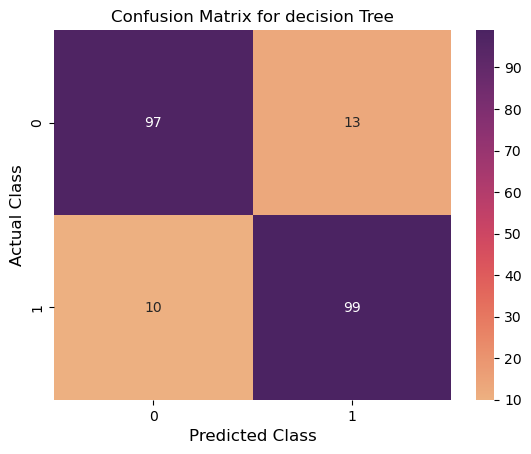

In [26]:
ax=sns.heatmap(dct_cm,cmap='flare',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Actual Class",fontsize=12)
plt.title("Confusion Matrix for decision Tree ",fontsize=12)
plt.show()

In [27]:
roc_auc_score(Y_test,y_pred_classifier)

0.8950375312760634

# Feature Important Techniques for Decision Tree model

In [28]:
feature =df.columns.tolist()

In [29]:
feature.remove('high_humidity_3pm')

In [30]:
#feature importance for decision tree
important_features = classifier.feature_importances_
important_features_df = pd.DataFrame({'Feature': feature, 'Importance': important_features})
important_features_df = important_features_df.sort_values('Importance', ascending = False)

In [31]:
print('Feature Importance for decision tree:')
print(important_features_df)

Feature Importance for decision tree:
                  Feature  Importance
8   relative_humidity_9am    0.554897
0        air_pressure_9am    0.154419
4  max_wind_direction_9am    0.103605
1            air_temp_9am    0.082526
2  avg_wind_direction_9am    0.051170
5      max_wind_speed_9am    0.027643
7       rain_duration_9am    0.014331
3      avg_wind_speed_9am    0.007284
6   rain_accumulation_9am    0.004125


# Feature selection to re-train my model with decision tree

#Re- Train your Decision Tree Model based on the findings of the feature importance
#Drop columns in pandas python

X2 = .. 
Y2 = .. 

X_train2_X_test2, y_test2_ y_train2 = train_test_split(X2,Y2,test_size = 0.2,stratify = Y,random_state = 0) 

classifier2 = ..

In [32]:
feature

['air_pressure_9am',
 'air_temp_9am',
 'avg_wind_direction_9am',
 'avg_wind_speed_9am',
 'max_wind_direction_9am',
 'max_wind_speed_9am',
 'rain_accumulation_9am',
 'rain_duration_9am',
 'relative_humidity_9am']

In [33]:
# Dropping columns 'B' and 'C'

#cols_of_interest = ['air_pressure_9am', 'avg_wind_direction_9am','air_temp_9am', 'max_wind_direction_9am','max_wind_speed_9am','relative_humidity_9am']
#df2 = df[cols_of_interest]
#X2 = df2[['air_pressure_9am', 'avg_wind_direction_9am','air_temp_9am', 'max_wind_direction_9am','max_wind_speed_9am','relative_humidity_9am']]


columns_to_drop = ['avg_wind_speed_9am', 'rain_duration_9am','rain_accumulation_9am']
X2 = df.drop(columns_to_drop, axis = 1)
Y2 = df['high_humidity_3pm']
#print(X2)

X_train2,X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2,test_size = 0.2,stratify = Y ,random_state = 0) 

In [34]:
from sklearn.preprocessing import StandardScaler

sc2 = StandardScaler()
X_train_s2 = sc2.fit_transform(X_train2)
X_test_s2 = sc2.transform(X_test2)

In [35]:
from sklearn.tree import DecisionTreeClassifier
new_classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
new_classifier.fit(X_train_s2,Y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred_new_classifier = new_classifier.predict(X_test_s2)
print(y_pred_new_classifier)

[0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1]


In [37]:
from sklearn import metrics
dct_acc2=metrics.accuracy_score(Y_test2,y_pred_new_classifier)
print('accuracy:%.2f\n\n'%(dct_acc2))
dct_cm2=metrics.confusion_matrix(Y_test2,y_pred_new_classifier)
print("Confusion Matrix for Decision Tree after feature selection method")
print(dct_cm2,"\n\n")
print("------------------------------------------")
decision_tree_result2=metrics.classification_report(Y_test2,y_pred_new_classifier)
print("Classification Report after feature selection method :\n")
print(decision_tree_result2)

accuracy:1.00


Confusion Matrix for Decision Tree after feature selection method
[[110   0]
 [  0 109]] 


------------------------------------------
Classification Report after feature selection method :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       109

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



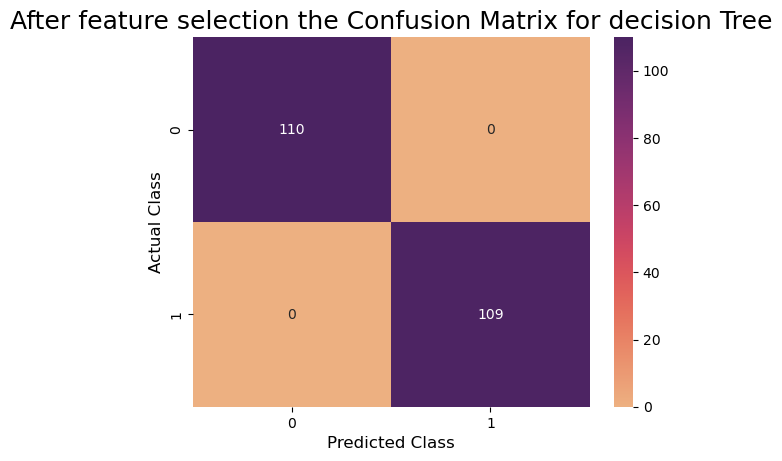

In [40]:
ax=sns.heatmap(dct_cm2,cmap='flare',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Actual Class",fontsize=12)
plt.title("After feature selection the Confusion Matrix for decision Tree",fontsize=18)
plt.show()

In [41]:
roc_auc_score(Y_test2 ,y_pred_new_classifier)

1.0

# Set Random Forest model into the Machine Learning

In [44]:
# Set  the Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier= RandomForestClassifier(n_estimators = 70, max_depth=12)
rf_classifier.fit(X_train_s,Y_train)

RandomForestClassifier(max_depth=12, n_estimators=70)

In [45]:
randomForest_y_pred=rf_classifier.predict(X_test_s)
print(randomForest_y_pred)

[0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1]


In [46]:
print(Y_test)

799     0
299     1
969     0
200     0
368     0
       ..
1010    0
66      0
343     1
222     1
472     1
Name: high_humidity_3pm, Length: 219, dtype: int64


In [47]:
from sklearn import metrics
rf_acc=metrics.accuracy_score(Y_test,randomForest_y_pred)
print('accuracy:%.2f\n\n'%(rf_acc))
rf_cm=metrics.confusion_matrix(Y_test,randomForest_y_pred)
print("Confusion Matrix for Randon Forest")
print(rf_cm,"\n\n")
print("------------------------------------------")
rf_result=metrics.classification_report(Y_test,randomForest_y_pred)
print("Classification Report for Random Forest:\n")
print(rf_result)

accuracy:0.93


Confusion Matrix for Randon Forest
[[103   7]
 [  8 101]] 


------------------------------------------
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       110
           1       0.94      0.93      0.93       109

    accuracy                           0.93       219
   macro avg       0.93      0.93      0.93       219
weighted avg       0.93      0.93      0.93       219



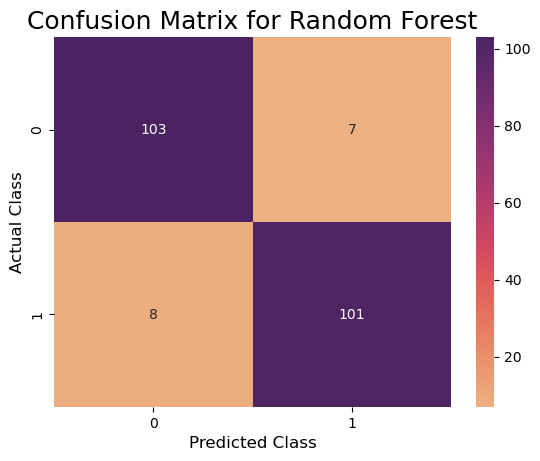

In [48]:
ax=sns.heatmap(rf_cm,cmap='flare',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Actual Class",fontsize=12)
plt.title("Confusion Matrix for Random Forest",fontsize=18)
plt.show()

In [49]:
roc_auc_score(Y_test,randomForest_y_pred)

0.9314845704753962

# Feature selection for random forest

In [50]:
#feature importance for random forest
important_features_ranfor = rf_classifier.feature_importances_
important_features_new_rf = pd.DataFrame({'Features for Random Forest': feature, 'Importance': important_features})
important_features_new_rf= important_features_new_rf.sort_values('Importance', ascending = False)

In [51]:
print('Feature Importance for Random Froest:')
print(important_features_new_rf)

Feature Importance for Random Froest:
  Features for Random Forest  Importance
8      relative_humidity_9am    0.554897
0           air_pressure_9am    0.154419
4     max_wind_direction_9am    0.103605
1               air_temp_9am    0.082526
2     avg_wind_direction_9am    0.051170
5         max_wind_speed_9am    0.027643
7          rain_duration_9am    0.014331
3         avg_wind_speed_9am    0.007284
6      rain_accumulation_9am    0.004125


In [52]:
# Training testing split

columns_to_drop = ['avg_wind_speed_9am', 'rain_duration_9am','rain_accumulation_9am']
X3 = df.drop(columns_to_drop, axis = 1)
Y3 = df['high_humidity_3pm']
#print(X3)

X_train3,X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3,test_size = 0.2,stratify = Y ,random_state = 0) 

In [53]:
# standard scaler

from sklearn.preprocessing import StandardScaler

sc3 = StandardScaler()
X_train_s3 = sc3.fit_transform(X_train3)
X_test_s3 = sc3.transform(X_test3)

In [ ]:
# applying the model

from sklearn.tree import DecisionTreeClassifier
new_classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
new_classifier.fit(X_train_s2,Y_train2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
new_rf_classifier= RandomForestClassifier(n_estimators = 70, max_depth=12)
new_rf_classifier.fit(X_train_s3,Y_train3)

RandomForestClassifier(max_depth=12, n_estimators=70)

In [58]:
# prediction
y_pred_new_rf_classifier = new_classifier.predict(X_test_s2)
print(y_pred_new_rf_classifier)

[0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1]


In [69]:
# metrics
from sklearn import metrics
new_rf_acc2=metrics.accuracy_score(Y_test3,y_pred_new_rf_classifier)
print('accuracy:%.2f\n\n'%(new_rf_acc2))
new_rf_cm2=metrics.confusion_matrix(Y_test3,y_pred_new_rf_classifier)
print("Confusion Matrix for Decision Tree after feature selection method")
print(new_rf_cm2,"\n\n")
print("------------------------------------------")
new_rf_result=metrics.classification_report(Y_test3,y_pred_new_classifier)
print("Classification Report after feature selection method :\n")
print(new_rf_result)

accuracy:1.00


Confusion Matrix for Decision Tree after feature selection method
[[110   0]
 [  0 109]] 


------------------------------------------
Classification Report after feature selection method :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       109

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



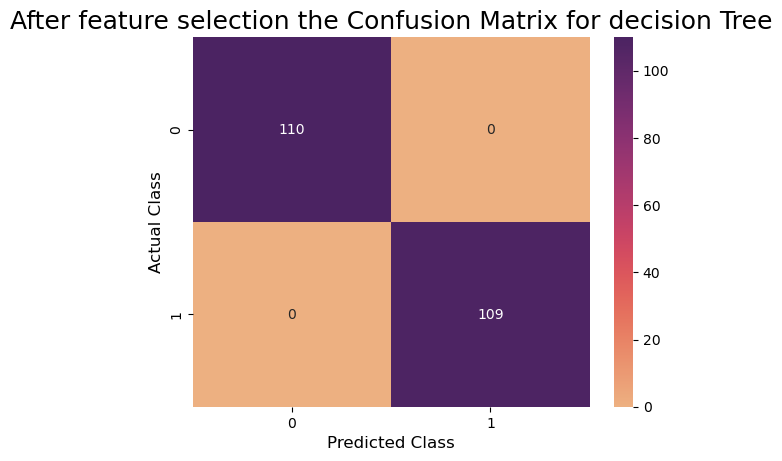

In [71]:
ax=sns.heatmap(new_rf_cm2,cmap='flare',annot=True,fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Actual Class",fontsize=12)
plt.title("After feature selection the Confusion Matrix for decision Tree",fontsize=18)
plt.show()

In [72]:
roc_auc_score(Y_test3,y_pred_new_rf_classifier)

1.0